In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Bio.Seq import Seq

# Assuming df is your pandas DataFrame

df = pd.read_csv('/Users/dominiquefastus/master_project/NuStru/nustruDB/DDLA_uniprot_sec_struct_04.csv')
df['bfactor_or_plddt'] = df['bfactor_or_plddt'].apply(eval)


In [3]:
from Bio.SeqUtils import CodonAdaptationIndex
sequence = df['nucleotide_sequence'].iloc[1:4]
# CodonAdaptationIndex(sequences=sequence)
def get_codons(nucleotide_sequence):
    return [nucleotide_sequence[i:i+3] for i in range(0, len(nucleotide_sequence), 3)]

df

,source,primary_id,gene_name,organism,expression_system,protein_sequence,nucleotide_id,nucleotide_sequence,bfactor_or_plddt,secondary_structure
0,uniprot,A0A0F7VKB3,ddlA,Streptococcus salivarius,NaN,VAGVPQVAYTVFIEGEDLEAAVAETLEKLTFPVFVKPANMGSSVGI...,LN811585,GTTGCTGGTGTGCCTCAGGTTGCCTACACAGTCTTCATCGAGGGTG...,"{1: 55.94, 2: 80.56, 3: 89.69, 4: 93.94, 5: 94...",--S-----EEEEETTS-HHHHHHHHHHH--SSEEEEETT--TTTT-...
1,uniprot,A0A7Y8AQ80,ddlA,Pseudomonas tolaasii,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000256|H...,MSKVRVGIIFGGRSAEHEVSLQSARNIVDALDRSRFEPVLIGIDKA...,JACAQK010000009,ATGAGCAAGGTGCGGGTAGGTATTATTTTTGGTGGCCGTTCGGCCG...,"{1: 60.81, 2: 87.12, 3: 94.94, 4: 97.25, 5: 97...",-PPEEEEEEEE-SSTTHHHHHHHHHHHHHHS-TTTEEEEEEEE-TT...
2,uniprot,P9WP31,ddl,Mycobacterium tuberculosis (strain ATCC 25618 ...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000255|H...,MSANDRRDRRVRVAVVFGGRSNEHAISCVSAGSILRNLDSRRFDVI...,AL123456,GTGAGTGCTAACGACCGGCGTGATCGGCGTGTCCGCGTTGCCGTCG...,"{1: 43.28, 2: 36.89, 3: 40.92, 4: 36.91, 5: 42...",--TTTTTSSPEEEEEEEE-SSTTHHHHHHHHHHHHHHS-TTTEEEE...
3,uniprot,I9XF39,ddlA,Helicobacter pylori Hp P-74,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000256|A...,MEFCILFGGASFEHEISIVSAIALKGVLKDRIKYFIFLDENHHFYL...,AKPX01000002,GTGGAGTTTTGCATTTTATTTGGTGGGGCGAGTTTTGAGCATGAAA...,"{1: 89.56, 2: 96.12, 3: 98.12, 4: 98.38, 5: 98...",--EEEEEE-SSTTHHHHHHHHHHHHHHHGGGEEEEEEE-TT--EEE...
4,uniprot,A0A6I6DLM7,ddlA,Leclercia sp. 119287,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000256|H...,MAKLRVGIVFGGKSAEHEVSLQSAKNIVNAIDKSRFEVVLLGIDKQ...,CP046445,ATGGCGAAGTTGCGGGTAGGTATTGTCTTTGGGGGAAAATCAGCCG...,"{1: 62.47, 2: 86.75, 3: 95.88, 4: 98.12, 5: 98...",-PPEEEEEEEE-SSTTHHHHHHHHHHHHHHS-TTTEEEEEEEE-TT...
...,...,...,...,...,...,...,...,...,...,...
1647,uniprot,A0A1Z5IU11,ddlA,Secundilactobacillus pentosiphilus,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000256|A...,MKIVVLAGGRSTERNVSLSSSAKVANALRRKGYEVALVDLFLGLPD...,BCMI01000003,ATGAAGATCGTAGTATTAGCGGGCGGTCGTTCAACGGAACGCAACG...,"{1: 94.75, 2: 97.69, 3: 98.5, 4: 98.62, 5: 98....",-EEEEEE--SSTTHHHHHHHHHHHHHHHHHTT-EEEEEETTT--TT...
1648,uniprot,A0A6I4VAW5,ddlA,Pantoea sp. Eser,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000256|H...,MTKLRVGIVFGGKSAEHEVSLQSAKNILDAIDKTRFEVVLLGIDKQ...,SZZY01000015,ATGACAAAGTTGCGGGTAGGGATCGTGTTTGGCGGCAAATCGGCCG...,"{1: 59.0, 2: 87.25, 3: 95.69, 4: 97.81, 5: 98....",-PPEEEEEEEE-SSTTHHHHHHHHHHHHHHS-TTTEEEEEEEE-TT...
1649,uniprot,A0A7Y8A747,ddlA,Pseudomonas sp. IPO3778,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000256|H...,MSKLRVGIIFGGRSAEHEVSLQSARNIVDALDRSRFEPILIGIDKA...,JACARC010000014,ATGAGCAAGCTGCGGGTAGGGATTATTTTTGGTGGCCGTTCGGCCG...,"{1: 60.09, 2: 87.06, 3: 94.75, 4: 97.12, 5: 96...",-PPEEEEEEEE-SSTTHHHHHHHHHHHHHHS-TTTEEEEEEEE-TT...
1650,uniprot,A0A1Z5J4Y8,ddlA,Secundilactobacillus silagincola,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000256|A...,MKIVVLAGGRSTERNVSLSSSAKVANALRRKGYEVALVDLFLGLPD...,BCMJ01000008,ATGAAGATCGTGGTATTAGCGGGTGGTCGCTCAACGGAACGCAACG...,"{1: 95.31, 2: 98.06, 3: 98.62, 4: 98.69, 5: 98...",-EEEEEE--SSTTHHHHHHHHHHHHHHHHHTT-EEEEEETTT--TT...


In [8]:
import pandas as pd
from Bio.Seq import Seq
from Bio import motifs
from Bio import SeqUtils

df = pd.read_csv('/Users/dominiquefastus/master_project/NuStru/nustruDB/DDLA_uniprot_sec_struct_04.csv')

filtered_df = df[df['nucleotide_sequence'].str.len() == len(df['nucleotide_sequence'].iloc[40])]
instances = filtered_df['nucleotide_sequence'].apply(lambda x: Seq(x))
m = motifs.create(instances=instances)
print(m.alignment)

SeqUtils.CodonAdaptationIndex(instances)
# print(filtered_df['protein_sequence'])
with open('/Users/dominiquefastus/master_project/NuStru/nustruDB/uniprots.txt',"w") as file:
    file.write(f'{filtered_df['primary_id'].to_list()}')
print(df.index.get_loc(df[df['primary_id'] == 'P0A6J8'].index[0]))

                  0 ATGAGCAAGGTGCGGGTAGGTATTATTTTTGGTGGCCGTTCGGCCGAGCACGAAGTCTCG
                  0 ATGGGCAAGTTGCGAGTCGGGATTATTTTCGGTGGGTTGGGAGCGGAACACGAGGTGTCG
                  0 ATGAGCAAACTGCGGGTAGGCATTATTTTTGGTGGTCGTTCGGCTGAACACGAAGTGTCG
                  0 ATGGGCAAGTTGCGAGTCGGGATTATTTTCGGTGGGTTGGGGGCGGAGCATGAGGTGTCG
                  0 ATGGGCAAGTTGCGAGTCGGGATTATTTTCGGTGGGCTGGGCGCGGAGCATGAAGTGTCG
                  0 ATGGCAAAGTTGCGGGTAGGAATCGTATTTGGTGGTAAATCAGCGGAACATGAAGTGTCA
                  0 ATGAGCAAGGTGCGGGTAGGGATTATTTTTGGGGGCCGTTCGGCCGAACACGAAGTCTCG
                  0 ATGGCTAAATTGATTAATTTGTTATTGCTTTATGGTGGAAAATCAGGTGAGCATGAAGTT
                  0 ATGAGCAAGCTGCGGGTAGGGATTATTTTTGGTGGCCGTTCGGCCGAGCATGAAGTGTCG
                  0 ATGGCACGGACCCGGGTCGGCATCATCTTCGGGGGCAAGTCCTCCGAGCACGAAGTTTCG
                  0 ATGGCGAAATTGCGGGTAGGAATAGTATTTGGCGGTAAGTCGGCGGAACATGAAGTGTCT
                  0 ATGAGCAAGGTGCGGGTAGGTATTATTTTTGGTGGCCGTTCGGCTGAGCACGAAGTCTCG
                  0 ATGAGTAA

In [9]:
from collections import defaultdict

# Function to group a sequence into codons
def group_into_codons(sequence):
    codons = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
    return codons

# Function to calculate codon frequency
def calculate_codon_frequency(sequences):
    codon_frequencies = defaultdict(lambda: defaultdict(int))
    for sequence in sequences:
        codons = group_into_codons(sequence)
        for position, codon in enumerate(codons):
            codon_frequencies[position][codon] += 1
    
    total_sequences = len(sequences)
    for position, frequencies in codon_frequencies.items():
        for codon, count in frequencies.items():
            codon_frequencies[position][codon] = count / total_sequences
    
    return codon_frequencies

def calculate_char_frequency(sequences):
    # Initialize dictionary to store frequencies
    frequency = {}

    # Count occurrences of each character at each position
    for sequence in sequences:
        for i, char in enumerate(sequence):
            if i not in frequency:
                frequency[i] = {}
            if char not in frequency[i]:
                frequency[i][char] = 1
            else:
                frequency[i][char] += 1
    
    return frequency

In [94]:
# Calculate codon frequency
import pandas as pd
import json

df = pd.read_csv('/Users/dominiquefastus/master_project/NuStru/nustruDB/DDLA_uniprot_sec_struct_04.csv')

# cluster proteins with same sequence length
filtered_df = df[df['nucleotide_sequence'].str.len() == len(df['nucleotide_sequence'].iloc[40])]
nucleotide_sequences = filtered_df['nucleotide_sequence']
protein_sequences = filtered_df['protein_sequence']
secstru_sequences = filtered_df['secondary_structure']

print(len(protein_sequences.iloc[1]))
print(len(secstru_sequences.iloc[1]))
print(len(nucleotide_sequences.iloc[1]))

codon_frequency = calculate_codon_frequency(nucleotide_sequences)
# Convert to the requested format
codon_sequences_freq_dict = {}
for position, frequencies in codon_frequency.items():
    formatted_frequencies = []
    for codon, frequency in frequencies.items():
        formatted_frequencies.append({codon: frequency})
    codon_sequences_freq_dict[position] = formatted_frequencies

protein_sequences_freq_dict = calculate_char_frequency(protein_sequences)
secstru_sequences_freq_dict = calculate_char_frequency(secstru_sequences)

print(codon_sequences_freq_dict)
print(protein_sequences_freq_dict)
print(secstru_sequences_freq_dict)

with open('/Users/dominiquefastus/master_project/NuStru/nustruMOTIF/frequencies.txt','w') as file:
    file.write(json.dumps(codon_sequences_freq_dict))
    file.write(json.dumps(protein_sequences_freq_dict))
    file.write(json.dumps(secstru_sequences_freq_dict))

364
364
1095
{0: [{'ATG': 0.9892703862660944}, {'GTG': 0.01072961373390558}], 1: [{'AGC': 0.18025751072961374}, {'GGC': 0.023605150214592276}, {'GCA': 0.06652360515021459}, {'GCT': 0.006437768240343348}, {'GCG': 0.4570815450643777}, {'AGT': 0.023605150214592276}, {'GAA': 0.16523605150214593}, {'ACA': 0.004291845493562232}, {'AGA': 0.002145922746781116}, {'GAT': 0.002145922746781116}, {'AAA': 0.01072961373390558}, {'CTG': 0.002145922746781116}, {'GGT': 0.002145922746781116}, {'CGC': 0.002145922746781116}, {'TCA': 0.002145922746781116}, {'TCT': 0.019313304721030045}, {'TCC': 0.015021459227467811}, {'CCA': 0.002145922746781116}, {'TCG': 0.002145922746781116}, {'GCC': 0.002145922746781116}, {'CAG': 0.002145922746781116}, {'AAC': 0.002145922746781116}, {'GTA': 0.004291845493562232}], 2: [{'AAG': 0.27253218884120173}, {'AAA': 0.6845493562231759}, {'CGG': 0.017167381974248927}, {'CGC': 0.002145922746781116}, {'CAG': 0.008583690987124463}, {'AAC': 0.004291845493562232}, {'GAG': 0.0021459227467

In [108]:
sequence_grouped_df = df.groupby('protein_sequence', as_index=False)
for i, (name, group) in enumerate(sequence_grouped_df, 1):
    group_name = f'Group {i}'

group_labels = list(sequence_grouped_df.groups.keys())

with pd.option_context('display.max_colwidth', None):
    for x in range(0, len(group_labels) - 1):
        if len(sequence_grouped_df.get_group(group_labels[x])['protein_sequence']) >= 10:
             
            with open('/Users/dominiquefastus/master_project/NuStru/nustruMOTIF/ss_exampy.txt', "w") as file:
                file.write(f'{sequence_grouped_df.get_group(group_labels[x])['secondary_structure']}')
            
            print(sequence_grouped_df.get_group(group_labels[x])['secondary_structure'])
            print(sequence_grouped_df.get_group(group_labels[x])['nucleotide_sequence'])

        # group_2_ss = sequence_grouped_df.get_group(group_labels[3])['nucleotide_sequence']


366     -PPEEEEEEEE-SSTTHHHHHHHHHHHHHHS-TTTEEEEEEEE-TTS-EEEE-TTTSEESTT-TTT-EEPP-S-BEEE-TT-SS--EEETTT-PBPPPPSEEEE---STTTTSSHHHHHHHHTT--BSS--HHHHHHHHSHHHHHHHHHHTT--B--EEEEETTTTTTS-HHHHHHHH-SSEEEEESS-STTTT-EEESSHHHHHHHHHHHHHH-SEEEEEEPP-SEEEEEEEEESSS-EEEEEEEEE-SSSS--HHHHHT-TTS-EEESS-SS-HHHHHHHHHHHHHHHHHTT--EEEEEEEEE-TT--EEEEEEESS---STTSHHHHHHHHTT--HHHHHHHHHHHHHHHHHHHHTS-S--
414     -PPEEEEEEEE-SSTTHHHHHHHHHHHHHHS-TTTEEEEEEEE-TTS-EEEE-TTTSEESTT-TTT-EEPP-S-BEEE-TT-SS--EEETTT-PBPPPPSEEEE---STTTTSSHHHHHHHHTT--BSS--HHHHHHHHSHHHHHHHHHHTT--B--EEEEETTTTTTS-HHHHHHHH-SSEEEEESS-STTTT-EEESSHHHHHHHHHHHHHH-SEEEEEEPP-SEEEEEEEEESSS-EEEEEEEEEESSSS--HHHHHT-TTSEEEESS-SS-HHHHHHHHHHHHHHHHHTT--EEEEEEEEE-TT--EEEEEEESS---STTSHHHHHHHHTT--HHHHHHHHHHHHHHHHHHHHTS-S--
606     -PPEEEEEEEE-SSTTHHHHHHHHHHHHHHS-TTTEEEEEEEE-TTS-EEEE-TTTSEESTT-TTT-EEPP-S-BEEE-TT-SSS-EEETTT-PBPPPPSEEEE---STTTTSSHHHHHHHHTT--BSS--HHHHHHHHSHHHHHHHHHHTT--B--EEEEETTTTTTS-HHHHHHHH-SSEEEEESS-STTTT-EEESSHHHHHHHHHHHHHH-SEEEEEEPP-SEEEEEEEEESSS-EEEEEEE

In [3]:
import math
# Function to calculate RSCU
def calculate_rscu(codon_freq):
    total_codons = sum(codon_freq.values())
    rscu = {}
    for codon, freq in codon_freq.items():
        rscu[codon] = freq / total_codons
    return rscu

# Function to calculate ENC
def calculate_enc(rscu):
    n = len(rscu)
    summation = sum([(1 / n) * math.log2(freq) for freq in rscu.values()])
    return math.exp(summation)

# Function to calculate CUB index
def calculate_cub_index(enc, total_codons):
    nc = total_codons
    return 1 - (enc / nc)

# Calculate CUB index for each position
cub_indices = {}
for pos, amino_acid_freq in protein_sequences_freq_dict.items():
    for pos, codon_frequencies in codon_sequences_freq_dict.items():
        total_codons = sum(amino_acid_freq.values())
        codon_freq = codon_frequencies[pos]
        print(codon_freq.values())

print("CUB indices per position:")
print(cub_indices)

dict_values([1.0])
dict_values([0.3333333333333333])
dict_values([0.25])
dict_values([0.08333333333333333])
dict_values([0.3333333333333333])


IndexError: list index out of range

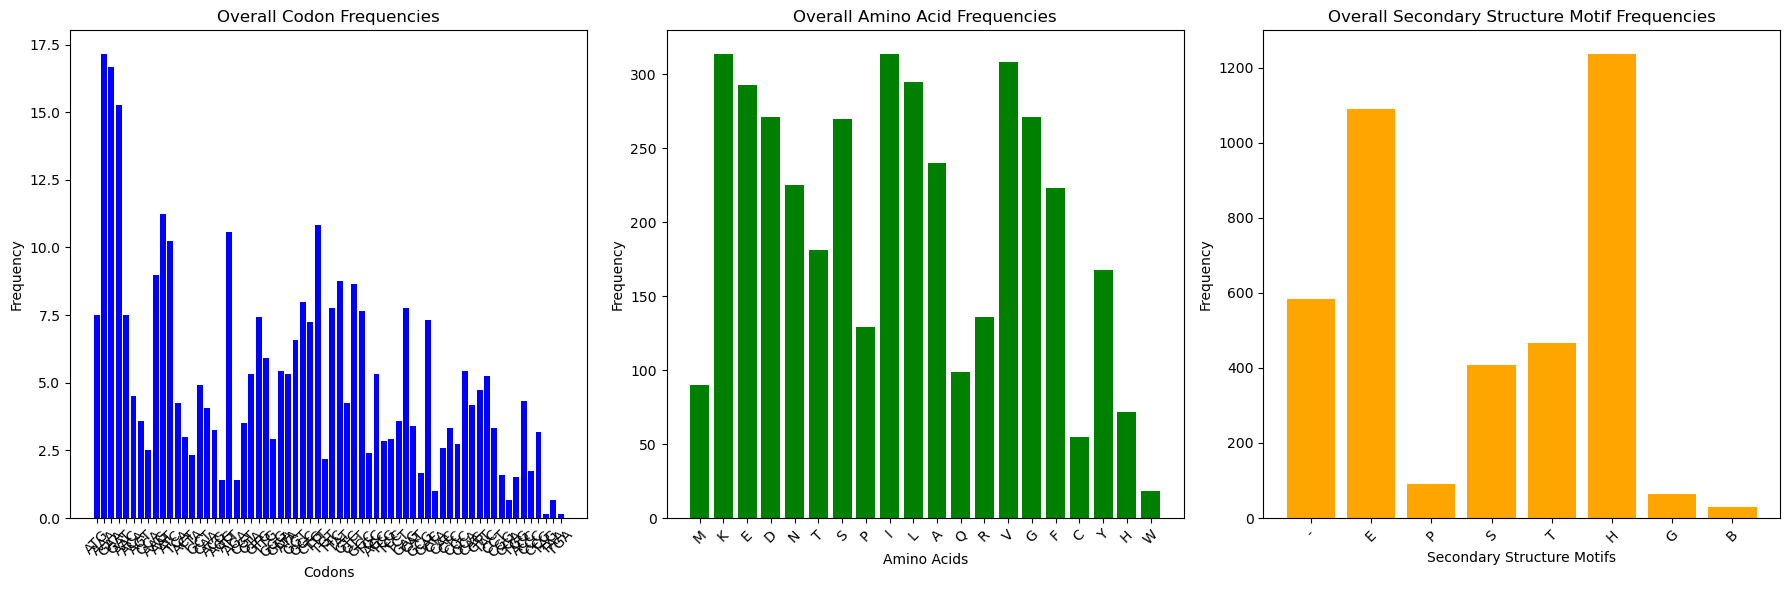

In [4]:
overall_codon_frequencies = {}

for position, codon_freqs in codon_sequences_freq_dict.items():
    for codon_freq in codon_freqs:
        codon, freq = list(codon_freq.items())[0]
        overall_codon_frequencies[codon] = overall_codon_frequencies.get(codon, 0) + freq


overall_amino_acid_frequencies = {}

for position, amino_acid_freqs in protein_sequences_freq_dict.items():
    for amino_acid, freq in amino_acid_freqs.items():
        overall_amino_acid_frequencies[amino_acid] = overall_amino_acid_frequencies.get(amino_acid, 0) + freq


overall_secondary_structure_frequencies = {}

for position, dssp_motif_freqs in secstru_sequences_freq_dict.items():
    for motif, freq in dssp_motif_freqs.items():
        overall_secondary_structure_frequencies[motif] = overall_secondary_structure_frequencies.get(motif, 0) + freq

import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot overall codon frequencies
axs[0].bar(overall_codon_frequencies.keys(), overall_codon_frequencies.values(), color='blue')
axs[0].set_xlabel('Codons')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Overall Codon Frequencies')
axs[0].tick_params(axis='x', rotation=45)

# Plot overall amino acid frequencies
axs[1].bar(overall_amino_acid_frequencies.keys(), overall_amino_acid_frequencies.values(), color='green')
axs[1].set_xlabel('Amino Acids')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Overall Amino Acid Frequencies')
axs[1].tick_params(axis='x', rotation=45)

# Plot overall secondary structure motif frequencies
axs[2].bar(overall_secondary_structure_frequencies.keys(), overall_secondary_structure_frequencies.values(), color='orange')
axs[2].set_xlabel('Secondary Structure Motifs')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Overall Secondary Structure Motif Frequencies')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


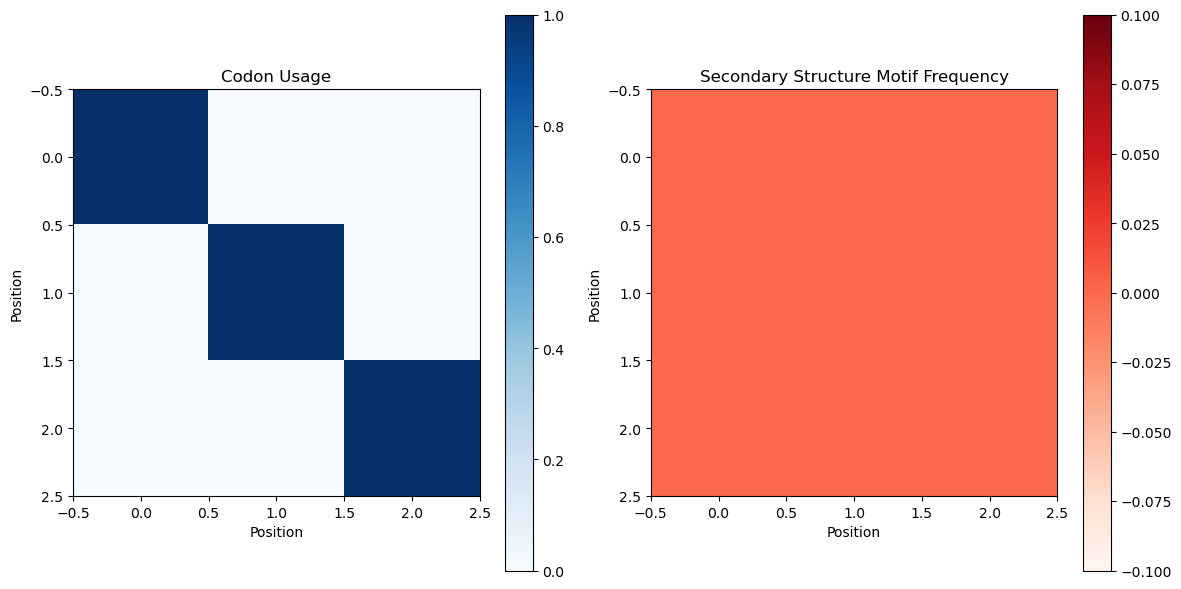

In [6]:
import numpy as np

# Create matrices
codon_matrix = np.zeros((3, 3))
sec_stru_matrix = np.zeros((3, 3))

for pos in range(3):
    for codon_dict in codon_sequences_freq_dict[pos]:
        codon, freq = list(codon_dict.items())[0]
        codon_matrix[pos][pos] += freq
        sec_stru_matrix[pos][pos] += secstru_sequences_freq_dict[pos].get(codon, 0)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Codon Usage Heatmap
im1 = ax1.imshow(codon_matrix, cmap='Blues')

# Secondary Structure Motif Frequency Heatmap
im2 = ax2.imshow(sec_stru_matrix, cmap='Reds')

# Add colorbars
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)

# Set titles and labels
ax1.set_title('Codon Usage')
ax1.set_xlabel('Position')
ax1.set_ylabel('Position')

ax2.set_title('Secondary Structure Motif Frequency')
ax2.set_xlabel('Position')
ax2.set_ylabel('Position')

# Show plot
plt.tight_layout()
plt.show()

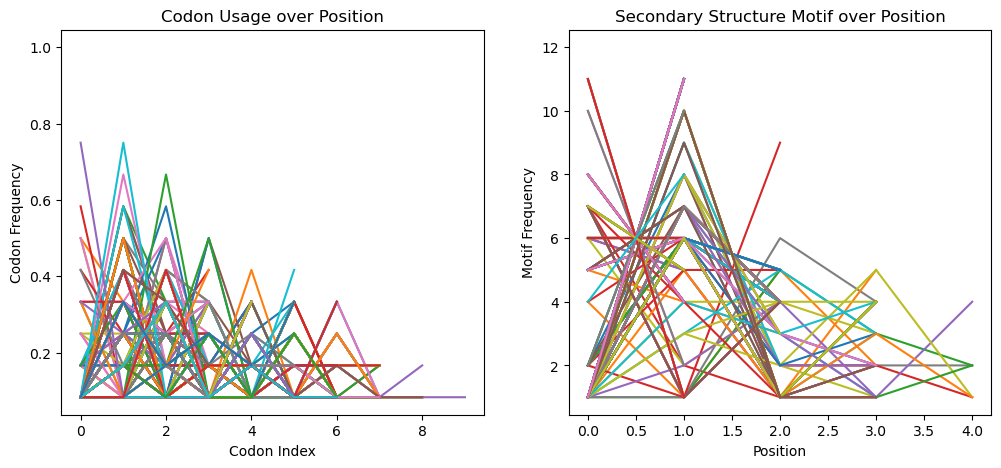

In [10]:

positions = sorted(secstru_sequences_freq_dict.keys())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Line plot for Codon Usage over Position
for pos in positions:
    codons = []
    frequencies = []
    for codon_dict in codon_sequences_freq_dict[pos]:
        codon, freq = list(codon_dict.items())[0]
        codons.append(codon)
        frequencies.append(freq)
    ax1.plot(range(len(codons)), frequencies, label=f'Position {pos} - Codons: {", ".join(codons)}')
ax1.set_title('Codon Usage over Position')
ax1.set_xlabel('Codon Index')
ax1.set_ylabel('Codon Frequency')

# Line plot for Secondary Structure Motif over Position
for pos in positions:
    motifs = list(secstru_sequences_freq_dict[pos].keys())
    frequencies = list(secstru_sequences_freq_dict[pos].values())
    ax2.plot(range(len(motifs)), frequencies, label=f'Position {pos} - Motifs: {", ".join(motifs)}')
ax2.set_title('Secondary Structure Motif over Position')
ax2.set_xlabel('Position')
ax2.set_ylabel('Motif Frequency')

plt.show()

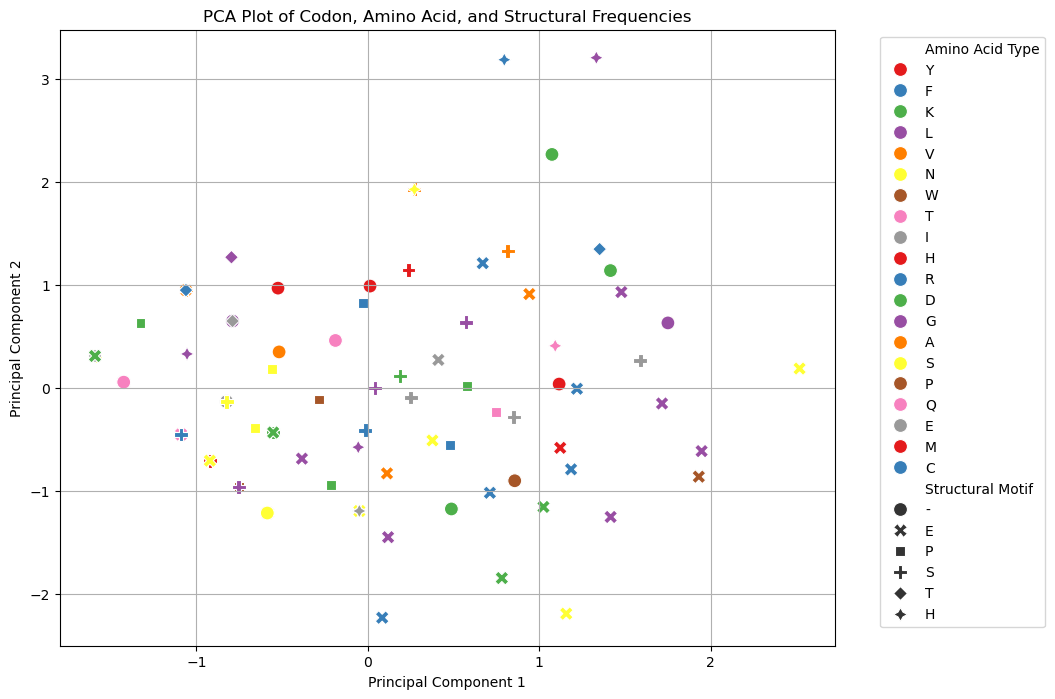

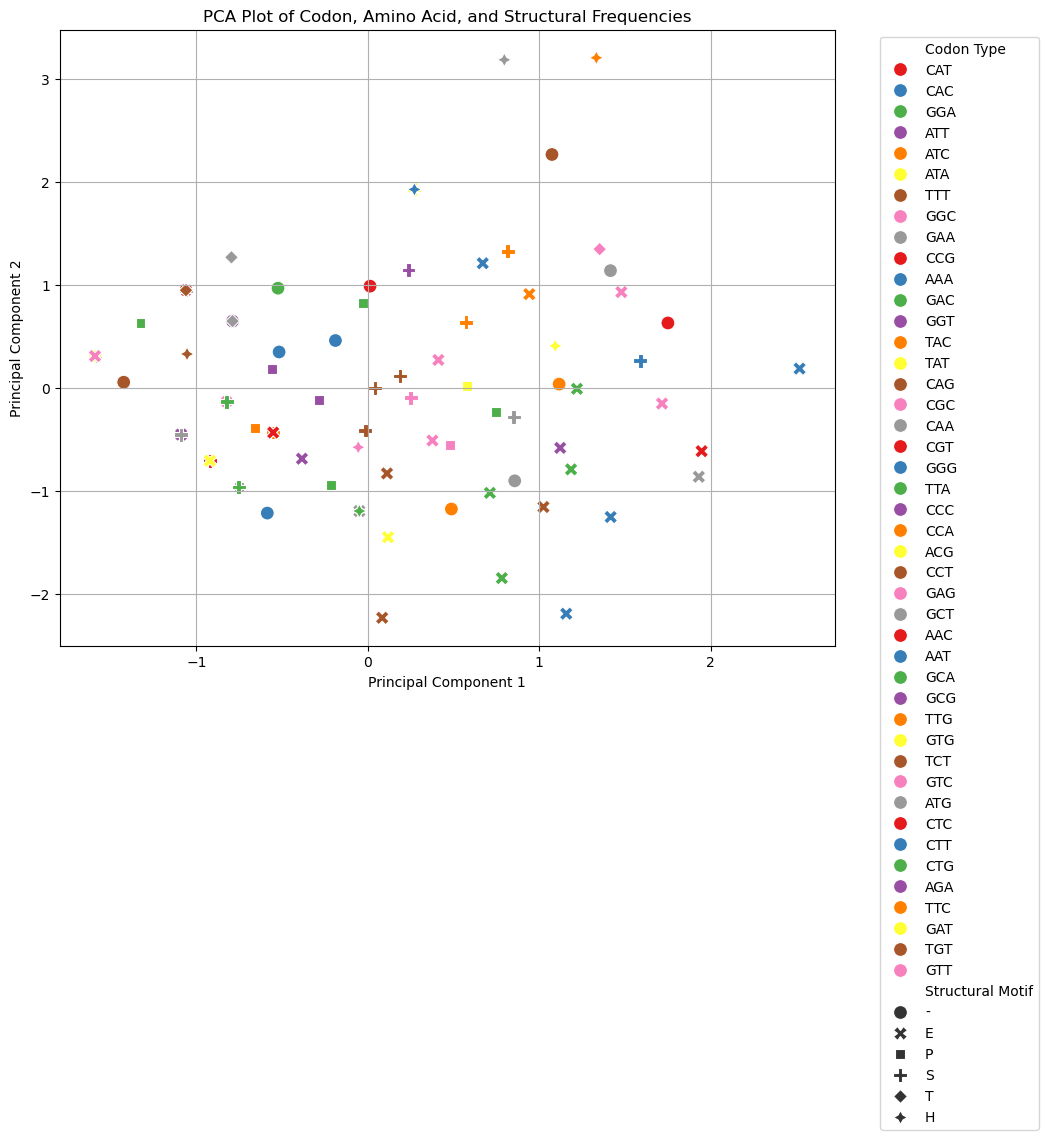

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def value_key_list(data):
    keys = []
    values = []

    for key, dicts in data.items():
        for d in dicts:
            for k,v in d.items():
                keys.append(k)
                values.append(v)
    
    return keys,values

def value_key(data):
    keys = []
    values = []

    for inner_dict in data.values():
        for k,v in inner_dict.items():
            keys.append(k)
            values.append(v)
    
    return keys,values

codon_types, codon_frequencies = value_key_list(codon_sequences_freq_dict)
amino_acid_types, amino_acid_frequencies = value_key(protein_sequences_freq_dict)
structural_motifs, structural_frequencies = value_key(secstru_sequences_freq_dict)

start = 500
end = 600 # len(structural_motifs)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Codon Frequency': codon_frequencies[start:end],
    'Amino Acid Frequency': amino_acid_frequencies[start:end],
    'Structural Frequency': structural_frequencies[start:end],
    'Codon Type': codon_types[start:end],
    'Structural Motif': structural_motifs[start:end],
    'Amino Acid Type': amino_acid_types[start:end]
})

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Codon Frequency', 'Amino Acid Frequency', 'Structural Frequency']])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate principal components with categorical features
final_df = pd.concat([principal_df, data[['Amino Acid Type', 'Structural Motif']]], axis=1)

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=final_df, hue='Amino Acid Type', style='Structural Motif', palette='Set1', s=100)
plt.title('PCA Plot of Codon, Amino Acid, and Structural Frequencies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Codon Frequency', 'Amino Acid Frequency', 'Structural Frequency']])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate principal components with categorical features
final_df = pd.concat([principal_df, data[['Codon Type', 'Structural Motif']]], axis=1)

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=final_df, hue='Codon Type', style='Structural Motif', palette='Set1', s=100)
plt.title('PCA Plot of Codon, Amino Acid, and Structural Frequencies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

